### **Laboratorio 1**

### **Carga de Datos de Importacion Hidrocarburos**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import numpy as np

### **Datos de Importacion** 

In [3]:
df_import_2024 = pd.read_excel("IMPORTACION-HIDROCARBUROS-VOLUMEN-2024-12.xlsx", skiprows=6)
df_import_2025 = pd.read_excel("IMPORTACION-HIDROCARBUROS-VOLUMEN-2025-05.xlsx", skiprows=6)

print(df_import_2024.columns.tolist())

['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gas licuado de petróleo', 'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior', 'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas', 'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano', 'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido', 'Total importación']


In [4]:

df_import_2024["Diesel"] = df_import_2024["Diesel alto azufre"] + df_import_2024["Diesel bajo azufre"]
df_import_2025["Diesel"] = df_import_2025["Diesel bajo azufre"]


In [ ]:

columnas_deseadas = [
    "Fecha",
    "Gasolina Regular",
    "Gasolina Superior",
    "Diesel",
    "Gas Licuado De Petróleo"
]


df_import_2024.columns = df_import_2024.columns.str.strip().str.title()
df_import_2025.columns = df_import_2025.columns.str.strip().str.title()


df_2024_cols = df_import_2024[columnas_deseadas].copy()
df_2025_cols = df_import_2025[columnas_deseadas].copy()


df_total = pd.concat([df_2024_cols, df_2025_cols], ignore_index=True)


df_total["Fecha"] = pd.to_datetime(df_total["Fecha"], errors="coerce")


df_importacion_total = df_total.dropna()


df_importacion_total.set_index("Fecha", inplace=True)


In [6]:
df_importacion_total.to_csv("importacion_completa.csv", index=True)
# Cambiar nombre de columna
df_importacion_total.rename(columns={"Gasolina Superior": "Gasolina Superior"}, inplace=True)



C:\Users\Usuario\AppData\Local\Temp\ipykernel_16552\3433093277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importacion_total.rename(columns={"Gasolina Superior": "Gasolina Superior"}, inplace=True)


In [7]:
df_importacion_total.head()

,Gasolina Regular,Gasolina Superior,Diesel,Gas Licuado De Petróleo
Fecha,,,,
2001-01-01,177776.50,373963.96,566101.99,194065.738095
2001-02-01,123115.99,243091.07,489525.80,170703.380952
2001-03-01,161726.42,312084.38,575559.68,161837.371429
2001-04-01,127338.74,285054.89,437745.42,163048.642857
2001-05-01,168730.19,300913.67,552609.13,171518.861905


In [8]:
df_importacion_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 2001-01-01 to 2025-05-01
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gasolina Regular         293 non-null    float64
 1   Gasolina Superior        293 non-null    float64
 2   Diesel                   293 non-null    float64
 3   Gas Licuado De Petróleo  293 non-null    float64
dtypes: float64(4)
memory usage: 11.4 KB


## **Inciso 3**

### **Serie de Tiempo Gasolina Regular**

##### **Inicio, fin y frecuencia**

In [9]:
serie = df_importacion_total["Gasolina Superior"]
inicio = serie.index.min()
fin = serie.index.max()
frecuencia = pd.infer_freq(serie.index)

print("Inicio:", inicio)
print("Fin:", fin)
print("Frecuencia:", frecuencia)


Inicio: 2001-01-01 00:00:00
Fin: 2025-05-01 00:00:00
Frecuencia: MS


#### **Gráfico de la serie**

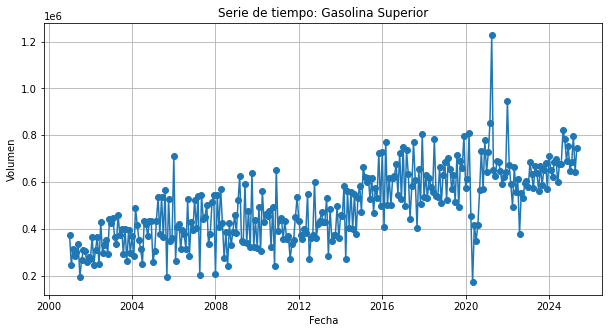

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(serie, marker='o', linestyle='-')
plt.title("Serie de tiempo: Gasolina Superior")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(True)
plt.show()


#### **Descomposición de la serie**

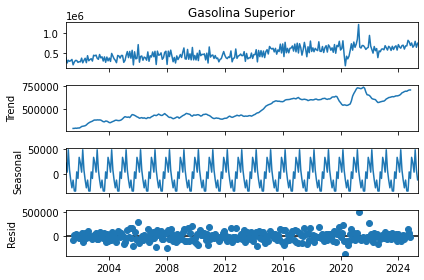

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

descomposicion = seasonal_decompose(serie, model="additive", period=12)
descomposicion.plot()
plt.tight_layout()
plt.show()


Al descomponer la serie de tiempo de gasolina superior en sus componentes —tendencia, estacionalidad y residuo— se pueden identificar varios comportamientos clave. La tendencia refleja un crecimiento sostenido desde el año 2000 hasta aproximadamente 2019, interrumpido por una caída evidente en 2020 durante la pandemia por COVID-19. A partir de 2021, se percibe una recuperación progresiva, aunque con cierta inestabilidad, posiblemente influenciada por choques externos como la guerra entre Rusia y Ucrania.

En cuanto al componente estacional, se observa un patrón muy definido y repetitivo a lo largo de cada año. Esta estacionalidad sugiere que existen meses específicos donde la importación de gasolina superior tiende sistemáticamente a aumentar o disminuir, lo cual podría estar vinculado a factores cíclicos como el turismo, las vacaciones o patrones económicos predecibles. Este patrón se mantiene relativamente estable incluso durante periodos de crisis, lo que indica una fuerte regularidad anual.

El componente residual, por su parte, no presenta una estructura clara pero muestra cierta dispersión creciente a lo largo del tiempo. En los años recientes se observan residuos más amplios, lo que podría indicar una mayor varianza asociada a factores impredecibles o inestables del contexto internacional, como choques de oferta, inflación de precios energéticos o tensiones geopolíticas.

Con base en estos componentes, se concluye que la serie no es estacionaria en media, debido a la tendencia creciente. Además, la estacionariedad en varianza es dudosa, ya que los residuos tienden a mostrar mayor amplitud con el paso del tiempo. Por tanto, antes de aplicar modelos de pronóstico, sería necesario transformar la serie —mediante diferenciación o escalamiento logarítmico— para lograr condiciones más apropiadas de estacionariedad.

#### **Transformar la serie**

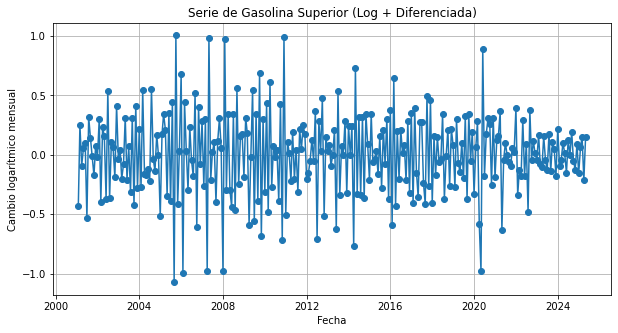

In [12]:

import matplotlib.pyplot as plt

serie_log = np.log(df_importacion_total["Gasolina Superior"])
serie_estacionaria = serie_log.diff().dropna()

plt.figure(figsize=(10,5))
plt.plot(serie_estacionaria, linestyle='-', marker='o')
plt.title("Serie de Gasolina Superior (Log + Diferenciada)")
plt.xlabel("Fecha")
plt.ylabel("Cambio logarítmico mensual")
plt.grid(True)
plt.show()


Fue necesario transformar la serie utilizando un logaritmo y el diferenciador diff para eliminar la tendencia creciente que existia.